In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
print(f"Pandas version: {pd.__version__}, matplotlib version: {matplotlib.__version__}")
Pandas version: 1.3.2, matplotlib version: 3.4.3

In [ ]:
## Sample data for examples

In [1]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [ ]:
#### Scatter plot of two columns

C:\Users\fadje\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


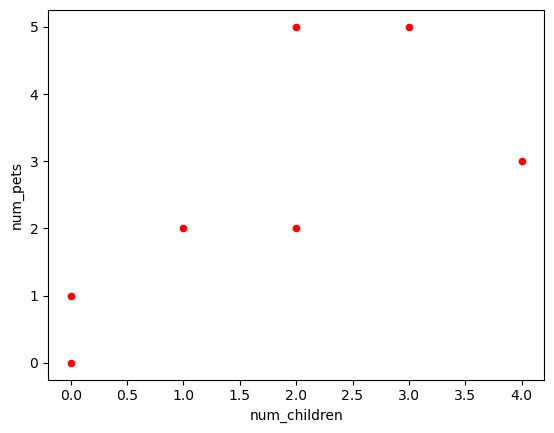

In [3]:
# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

In [ ]:
Bar plot of column values

<Axes: xlabel='name'>

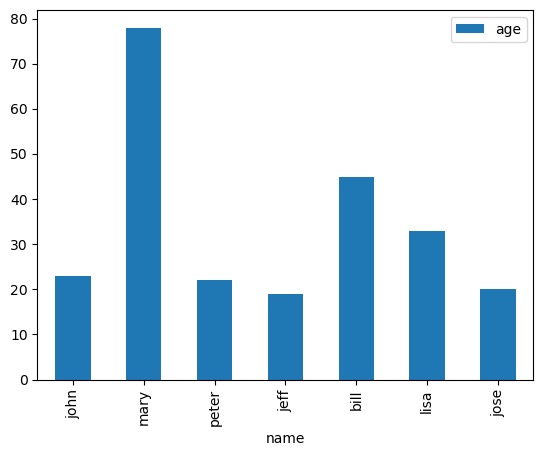

In [4]:
# a simple line plot
df.plot(kind='bar',x='name',y='age')

#### Line plot, multiple columns

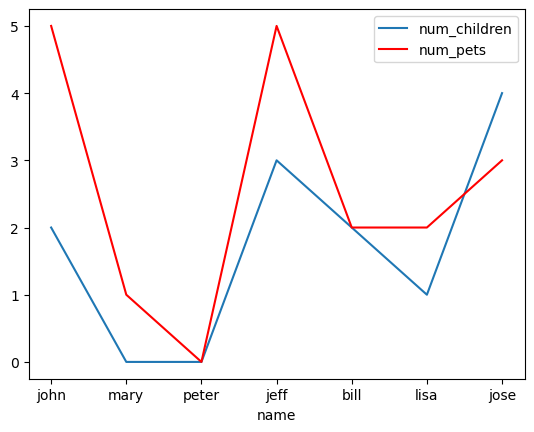

In [5]:
# Just reuse the Axes object.
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children', ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

#### Save plot to file
Instead of calling plt.show(), call plt.savefig('outputfile.png'):

In [ ]:
df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

#### Bar plot with group by

In [ ]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

#### Stacked bar plot with group by
Example: plot count by category as a stacked column:

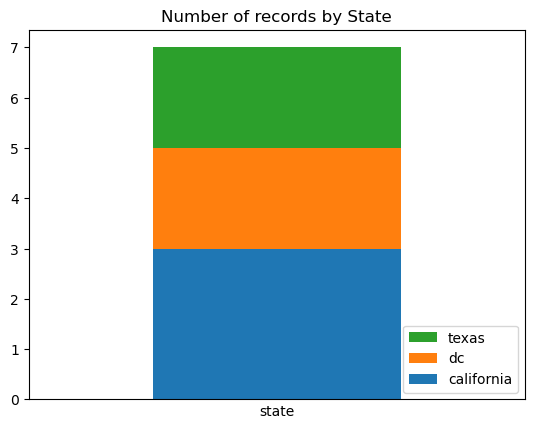

In [8]:
# create a dummy variable and do a two-level group-by based on it:
# fix the x axis label and the legend

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(['dummy','state']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)


plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [9]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


#### Stacked bar plot with group by, normalized to 100%
A plot where the columns sum up to 100%.
Similar to the example above but:
 - normalize the values by dividing by the total amounts
 - use percentage tick labels for the y axis

Example: Plot percentage count of records by state

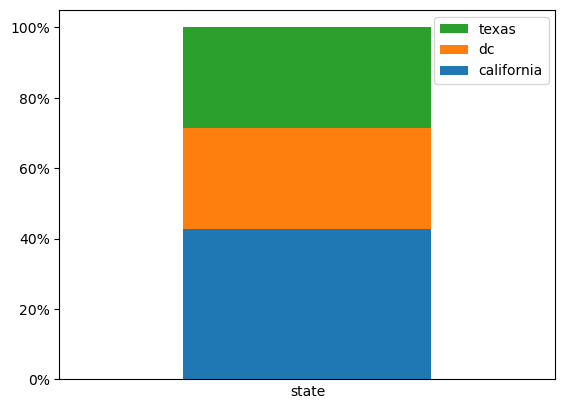

In [13]:
# create dummy variable then group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['state'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#### Stacked bar plot, two-level group by
Just do a normal groupby() and call unstack():

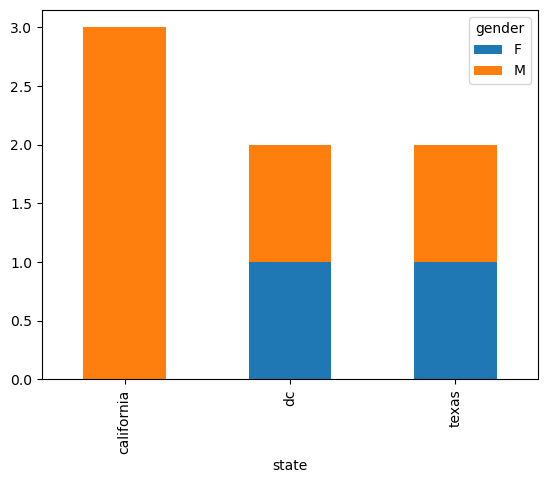

In [12]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
## Another example: count the people by gender, spliting by state:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

#### Stacked bar plot with two-level group by, normalized to 100%
Sometimes you are only ever interested in the distributions, not raw amounts:

In [ ]:
df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()